In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

%matplotlib inline

In [2]:
# k杆摇臂机
class K_armed_bandit(object):
    def __init__(self, num_k, seed= False):
        if seed:
            np.random.seed(1)
        self.loc = np.round(np.random.normal(size= num_k), decimals= 2)
        self.actions_list = np.arange(num_k).astype(np.int)
        
    def __call__(self, action):
        return self.run(action)
        
    def run(self, action):
        return np.random.normal(self.loc[action], scale= 0.1)
    
    def get_parms(self):
        return self.loc
    
    def get_actions_list(self):
        return self.actions_list

In [3]:
class Agent(object):
    
    def __init__(self,
                 environment,
                 epsilon_greedy= 1e-1,
                 step_size = 1e-3,
                 initial= 0.):
        
        self.environment = environment
        self.actions_list = environment.get_actions_list()
        self.num_actions = len(self.actions_list)
        self.greedy = 1.- epsilon_greedy
        self.step_size = step_size
        self.average_reward = 0
        self.action_value_array = np.array([initial] * self.num_actions)
        self.action_list = []
        self.reward_list = []
        
    def __call__(self, num_episodes= 1e3):
        for i in range(int(num_episodes)):
            self.step()
            
    def action_selection(self):
        if np.random.uniform() > self.greedy:
            action = np.random.choice(self.actions_list)
        else:
            action = self.get_argmax_action_value()
        return action
    
    def action_reward(self, action):
        return self.environment(action)
    
    def get_argmax_action_value(self):
        index = np.argmax(self.action_value_array)
        return self.actions_list[index]
    
    def get_next_action_value(self, action, reward):
        action_value = self.action_value_array[action]
        next_action_value = action_value + self.step_size * (reward - action_value)
        self.action_value_array[action] = next_action_value
    
    def step(self):
        action = self.action_selection()
        reward = self.action_reward(action)
        self.get_next_action_value(action, reward)
        # 记录训练过程
        self.action_list.append(action)
        self.reward_list.append(reward)

In [4]:
environment = K_armed_bandit(7)
means = environment.get_parms()
means

array([-0.75, -0.46,  0.98,  1.14,  2.17, -0.3 ,  2.43])

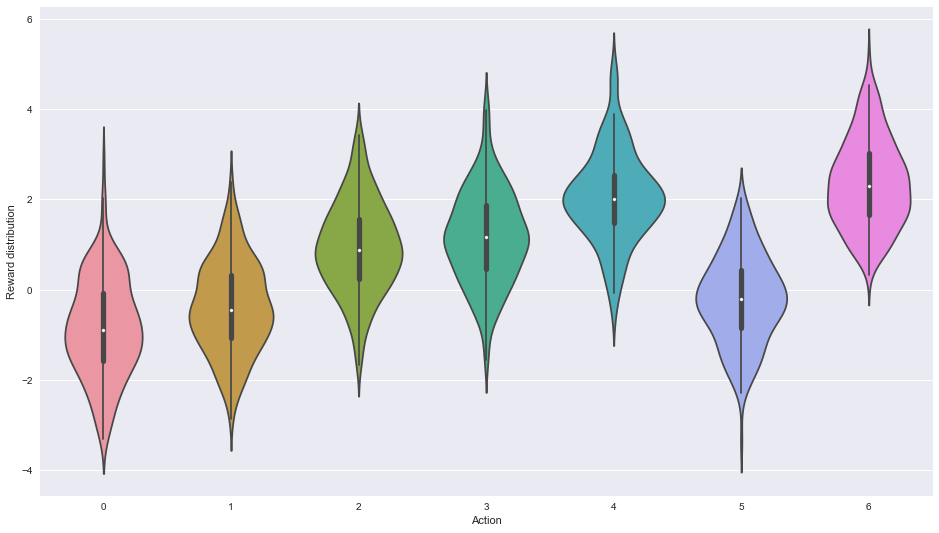

In [5]:
plt.figure(figsize=(16,9))
sns.violinplot(data=np.random.randn(200,len(means)) + means)
plt.xlabel("Action")
plt.ylabel("Reward distribution")

In [6]:
agent = Agent(environment)
agent(1e6)

In [7]:
agent.action_value_array

array([-0.74908123, -0.46121901,  0.97833316,  1.14047363,  2.17053165,
       -0.29900101,  2.4325315 ])

In [8]:
cumsum = np.arange(1, int(1e6)+1)
average_rewards = np.array(agent.reward_list).cumsum()
average_rewards = average_rewards / cumsum

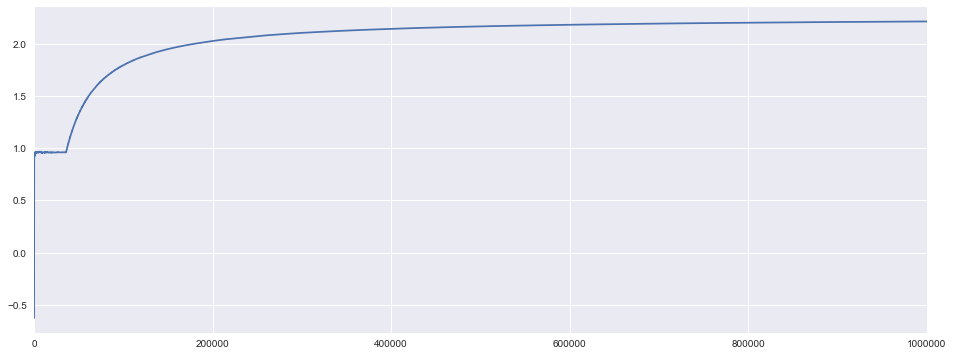

In [9]:
pd.Series(average_rewards).plot(figsize=(16,6))